<a href="https://colab.research.google.com/github/BCemreD/BCemreD/blob/main/AmesHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # 'kaggle.json'

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bcemredisli","key":"0d41c332ef7c893db0174b1712f6cc39"}'}

In [2]:
import os
import shutil

# Kaggle API anahtarını doğru konuma taşı
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/')
os.chmod('/root/.kaggle/kaggle.json', 600)  # sec. pre.

In [3]:
!kaggle datasets download -d shashanknecrothapa/ames-housing-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset
License(s): unknown
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 397MB/s]


In [4]:
import pandas as pd
df = pd.read_csv("AmesHousing.csv")
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

(2930, 82)

In [6]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
pd.set_option('display.max_rows', 100)
df.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
Lot Area,0
Street,0
Alley,2732
Lot Shape,0
Land Contour,0


In [8]:
dropped_columns = ["Order", "PID", "Alley", "Mas Vnr Type", "Pool QC", "Fence", "Misc Feature" ]
df.drop(dropped_columns, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

In [9]:
nan_percent = df.isnull().mean() * 100
print(nan_percent.sort_values(ascending=False))

Fireplace Qu       48.532423
Lot Frontage       16.723549
Garage Qual         5.426621
Garage Finish       5.426621
Garage Yr Blt       5.426621
Garage Cond         5.426621
Garage Type         5.358362
Bsmt Exposure       2.832765
BsmtFin Type 2      2.764505
Bsmt Cond           2.730375
BsmtFin Type 1      2.730375
Bsmt Qual           2.730375
Mas Vnr Area        0.784983
Bsmt Half Bath      0.068259
Bsmt Full Bath      0.068259
Bsmt Unf SF         0.034130
Total Bsmt SF       0.034130
BsmtFin SF 1        0.034130
BsmtFin SF 2        0.034130
Garage Area         0.034130
Garage Cars         0.034130
Electrical          0.034130
MS SubClass         0.000000
MS Zoning           0.000000
Lot Shape           0.000000
Street              0.000000
Lot Area            0.000000
Neighborhood        0.000000
Land Slope          0.000000
Lot Config          0.000000
Utilities           0.000000
Land Contour        0.000000
Exterior 1st        0.000000
Roof Matl           0.000000
Exterior 2nd  

In [10]:
from sklearn.impute import SimpleImputer

# Fireplace Qu should be handle as a att.
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

# Other categoricals
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Numerics
df_numeric = df.select_dtypes(include=['int64', 'float64'])
imputer = SimpleImputer(strategy='mean')
df[df_numeric.columns] = imputer.fit_transform(df[df_numeric.columns])


In [11]:
df.isnull().sum()

,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
Lot Area,0
Street,0
Lot Shape,0
Land Contour,0
Utilities,0
Lot Config,0
Land Slope,0


<ipython-input-13-332050183>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.index, y=corr_target.values, palette="ch:s=.25,rot=-.25")


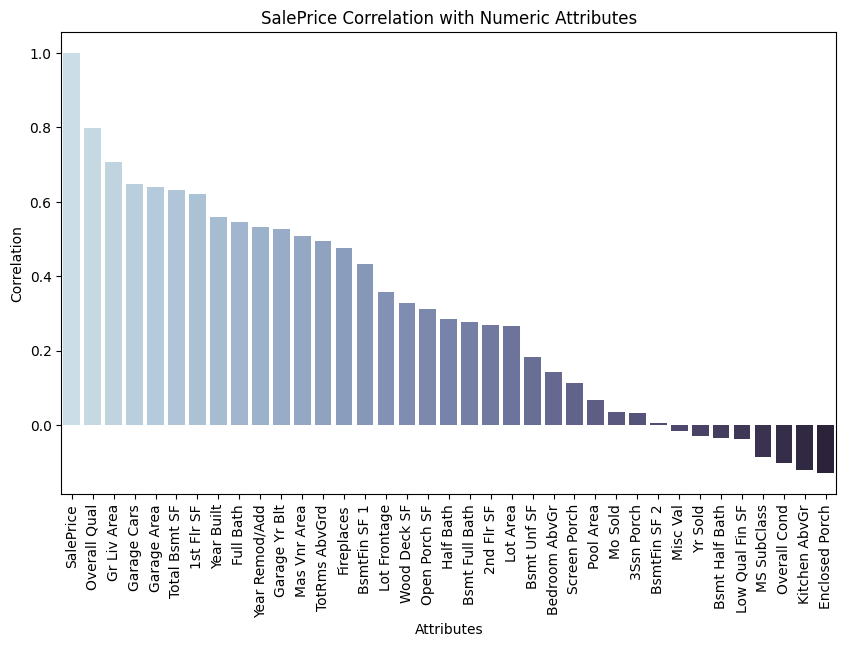

In [13]:
#Correlation for SalePrice w/ numeric attributes
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_numeric.corr()
corr_target = corr_matrix['SalePrice'].sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=corr_target.index, y=corr_target.values, palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.title("SalePrice Correlation with Numeric Attributes")
plt.xlabel("Attributes")
plt.ylabel("Correlation")
plt.show()

In [14]:
from scipy.stats import f_oneway

anova_pvals = {}

for col in df.select_dtypes(include="object").columns:
    # SalePrice for all categories
    groups = [df.loc[df[col] == cat, 'SalePrice'].dropna()
              for cat in df[col].dropna().unique()]

    # At least 2 groups are needed
    if len(groups) < 2:
        continue

    stat, p = f_oneway(*groups)   # stat = F, p = p‑value
    anova_pvals[col] = p          # ♻︎ save only p

# p‑values
anova_series = (pd.Series(anova_pvals, name='p_value')
                  .sort_values())      # ascending=True

print(anova_series.head(10))          # most significant 10 cat.


Neighborhood      0.000000e+00
Kitchen Qual      0.000000e+00
Bsmt Qual         0.000000e+00
Exter Qual        0.000000e+00
Fireplace Qu     2.543386e-229
Garage Finish    9.876391e-226
Foundation       1.267124e-205
Heating QC       4.917676e-152
Garage Type      2.540442e-118
Bsmt Exposure    1.514843e-116
Name: p_value, dtype: float64


In [18]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

num_feats = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF']
cat_feats = ['Heating QC', 'Fireplace Qu']   # Manually choose some attributes (arbitrary)

X = df[num_feats + cat_feats]
y = df['SalePrice']

#Pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),   # missings will be filled w /mod
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preproc = ColumnTransformer([
    ('num', num_pipe, num_feats),
    ('cat', cat_pipe, cat_feats)
])

rf = RandomForestRegressor(random_state=42)

model = Pipeline([
    ('prep', preproc),
    ('rf', rf)
])


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE :", mean_squared_error(y_test, y_pred))
print("R²  :", r2_score(y_test, y_pred))

MSE : 1145351578.2835786
R²  : 0.8571444052279086


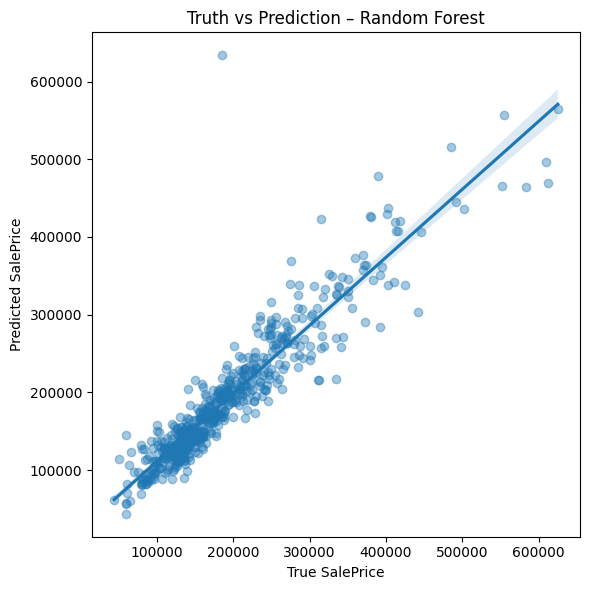

In [20]:
#Testing the model
plt.figure(figsize=(6,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
plt.xlabel("True SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Truth vs Prediction – Random Forest")
plt.tight_layout(); plt.show()


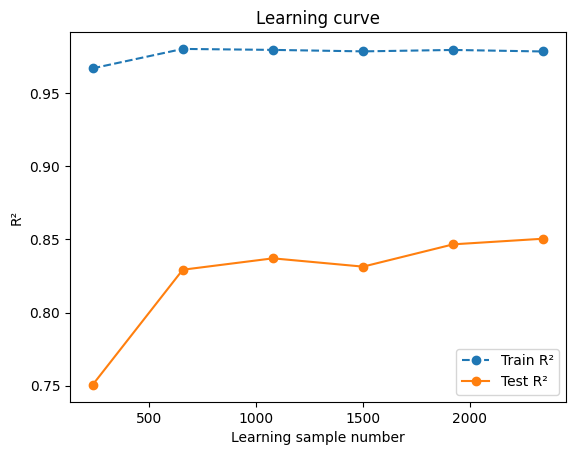

In [24]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 6), n_jobs=-1)

plt.plot(train_sizes, train_scores.mean(1), 'o--', label='Train R²')
plt.plot(train_sizes, test_scores.mean(1), 'o-',  label='Test R²')
plt.legend(); plt.xlabel("Learning sample number"); plt.ylabel("R²"); plt.title("Learning curve"); plt.show()

In [25]:
#Try with new attributes

df['House_Age'] = df['Yr Sold'] - df['Year Built']
df['Basement_Ratio'] = df['Total Bsmt SF'] / df['Gr Liv Area']

num_feats_extended = num_feats + ['House_Age', 'Basement_Ratio']
X_ext = df[num_feats_extended + cat_feats]

X_train, X_test, y_train, y_test = train_test_split(
    X_ext, y, test_size=0.2, random_state=42)

#  update num_feats list!
preproc_ext = ColumnTransformer([
    ('num', num_pipe, num_feats_extended),
    ('cat', cat_pipe, cat_feats)
])

model_ext = Pipeline([
    ('prep', preproc_ext),
    ('rf', rf)
])

model_ext.fit(X_train, y_train)
y_pred_ext = model_ext.predict(X_test)

print("▶ Model With New Attributes")
print("MSE :", mean_squared_error(y_test, y_pred_ext))
print("R²  :", r2_score(y_test, y_pred_ext))


▶ Model With New Attributes
MSE : 989237204.0359876
R²  : 0.8766159912530782


In [26]:
#Optimize hyperparameters w/ GridSearchCV
param_grid = {
    'rf__n_estimators': [200, 400, 600],
    'rf__max_depth':    [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf':  [1, 2, 4]
}

grid = GridSearchCV(
    estimator=model_ext,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1, verbose=2
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("▶ Optimized model")
print("MSE :", mean_squared_error(y_test, y_pred_best))
print("R²  :", r2_score(y_test, y_pred_best))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 400}
▶ Optimized model
MSE : 987349395.4205341
R²  : 0.8768514508514145
